In [1]:
print ("hello")

hello


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import make_scorer

In [3]:
column_names = [
    "checking_account_status", "duration_month", "credit_history", "purpose",
    "credit_amount", "savings_account", "present_employment_since", "installment_rate",
    "personal_status_sex", "other_debtors", "present_residence_since", "property",
    "age", "other_installment_plans", "housing", "existing_credits", "job",
    "liable_people", "telephone", "foreign_worker", "target"
]
df = pd.read_csv("german.data", delim_whitespace=True, header=None, names=column_names )
df.head()

,checking_account_status,duration_month,credit_history,purpose,credit_amount,savings_account,present_employment_since,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,existing_credits,job,liable_people,telephone,foreign_worker,target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [4]:
# SINCE "targrt" feature has 1 and 2 as good and bad we need to change it to 0 and 1
df["target"] = df["target"].map({1:0,2:1})
df.head(10)

,checking_account_status,duration_month,credit_history,purpose,credit_amount,savings_account,present_employment_since,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,existing_credits,job,liable_people,telephone,foreign_worker,target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,0
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,1
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,0
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,...,A122,53,A143,A152,1,A173,1,A191,A201,0
7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,...,A123,35,A143,A151,1,A174,1,A192,A201,0
8,A14,12,A32,A43,3059,A64,A74,2,A91,A101,...,A121,61,A143,A152,1,A172,1,A191,A201,0
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,...,A123,28,A143,A152,2,A174,1,A191,A201,1


In [5]:
df.info()
# WE CAN SEE THAT THERE IS NO NULL VALUES

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   checking_account_status   1000 non-null   object
 1   duration_month            1000 non-null   int64 
 2   credit_history            1000 non-null   object
 3   purpose                   1000 non-null   object
 4   credit_amount             1000 non-null   int64 
 5   savings_account           1000 non-null   object
 6   present_employment_since  1000 non-null   object
 7   installment_rate          1000 non-null   int64 
 8   personal_status_sex       1000 non-null   object
 9   other_debtors             1000 non-null   object
 10  present_residence_since   1000 non-null   int64 
 11  property                  1000 non-null   object
 12  age                       1000 non-null   int64 
 13  other_installment_plans   1000 non-null   object
 14  housing                  

In [6]:
df.describe()

,duration_month,credit_amount,installment_rate,present_residence_since,age,existing_credits,liable_people,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000


In [7]:
df['target'].value_counts()
# WE CAN SEE THAT THE DATA IS IMBALANCED

target
0    700
1    300
Name: count, dtype: int64

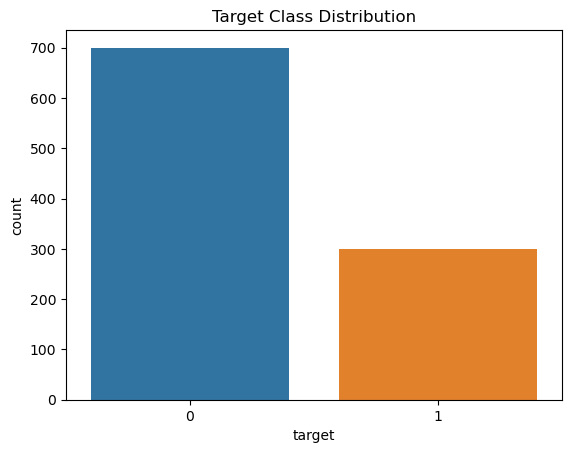

In [8]:
# VISUALIZING THE IMBALANCE
sns.countplot(data=df, x='target')
plt.title("Target Class Distribution")
plt.show()

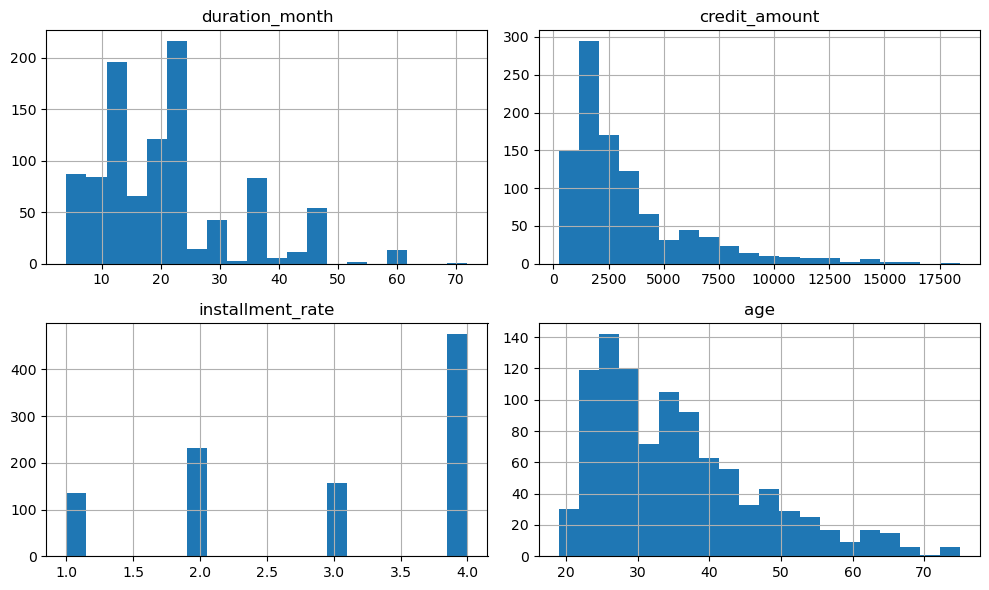

In [9]:
num_cols = ['duration_month', 'credit_amount', 'installment_rate', 'age']
df[num_cols].hist(figsize=(10, 6), bins=20)
plt.tight_layout()
plt.show()


In [10]:
X = df.drop('target', axis=1)
y = df['target']


In [11]:
cat_obj_cols = X.select_dtypes(include='object').columns.tolist()
cat_obj_cols

['checking_account_status',
 'credit_history',
 'purpose',
 'savings_account',
 'present_employment_since',
 'personal_status_sex',
 'other_debtors',
 'property',
 'other_installment_plans',
 'housing',
 'job',
 'telephone',
 'foreign_worker']

In [12]:
cat_int_cols = []

for col in X.columns:
    if df[col].nunique() <= 10 and df[col].dtype == 'int64':
        cat_int_cols.append(col)

cat_int_cols

['installment_rate',
 'present_residence_since',
 'existing_credits',
 'liable_people']

In [13]:
cat_cols = cat_obj_cols + cat_int_cols
cat_cols

['checking_account_status',
 'credit_history',
 'purpose',
 'savings_account',
 'present_employment_since',
 'personal_status_sex',
 'other_debtors',
 'property',
 'other_installment_plans',
 'housing',
 'job',
 'telephone',
 'foreign_worker',
 'installment_rate',
 'present_residence_since',
 'existing_credits',
 'liable_people']

In [14]:
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True, dtype= int)
X_encoded.head()

,duration_month,credit_amount,age,checking_account_status_A12,checking_account_status_A13,checking_account_status_A14,credit_history_A31,credit_history_A32,credit_history_A33,credit_history_A34,...,installment_rate_2,installment_rate_3,installment_rate_4,present_residence_since_2,present_residence_since_3,present_residence_since_4,existing_credits_2,existing_credits_3,existing_credits_4,liable_people_2
0,6,1169,67,0,0,0,0,0,0,1,...,0,0,1,0,0,1,1,0,0,0
1,48,5951,22,1,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
2,12,2096,49,0,0,1,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1
3,42,7882,45,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
4,24,4870,53,0,0,0,0,0,1,0,...,0,1,0,0,0,1,1,0,0,1


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42, stratify=y)


In [16]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=100,  # Number of trees
    max_depth=10,      # Prevent overfitting
    min_samples_split=5,
    class_weight='balanced',  # Adjusts for imbalance
    random_state=42
)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=5, random_state=42)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       210
           1       0.60      0.52      0.56        90

    accuracy                           0.75       300
   macro avg       0.70      0.69      0.69       300
weighted avg       0.75      0.75      0.75       300

ROC-AUC: 0.6873015873015873


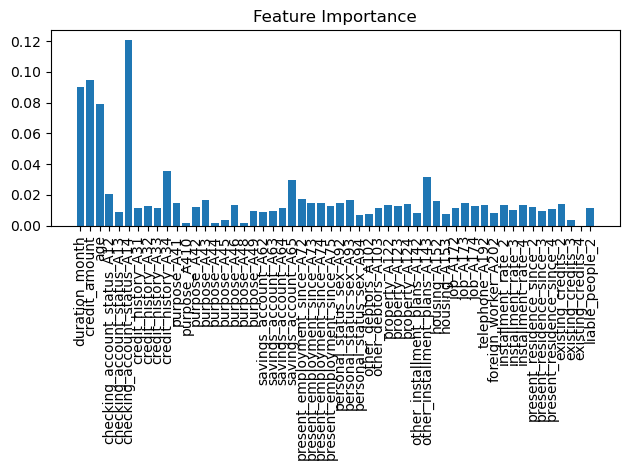

In [18]:
import matplotlib.pyplot as plt
importances = rf.feature_importances_
features = X_train.columns
plt.bar(features, importances)
plt.title("Feature Importance")
plt.xticks(rotation=90)
plt.tight_layout() 
plt.show()



In [21]:
def calculate_cost(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return fp * 1 + fn * 5  # False positives (Good->Bad) cost 1, false negatives (Bad->Good) cost 5

In [19]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print("Best params:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

Best params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


In [22]:
print(classification_report(y_test, y_pred_best))
print(calculate_cost(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       210
           1       0.64      0.51      0.57        90

    accuracy                           0.77       300
   macro avg       0.72      0.69      0.70       300
weighted avg       0.76      0.77      0.76       300

246


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import numpy as np

# Cost matrix weights (Good:0, Bad:1)
class_weights = {0: 1, 1: 5}  # Misclassifying Bad as Good costs 5x more

# Train Random Forest
model = RandomForestClassifier(
    class_weight=class_weights,
    n_estimators=200,
    max_depth=10,
    random_state=42
)
model.fit(X_train, y_train)



# Predict and evaluate
y_pred_new = model.predict(X_test)
cost = calculate_cost(y_test, y_pred_new)
print(classification_report(y_test, y_pred_new))
print(f"Test Cost: {cost}")

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       210
           1       0.59      0.63      0.61        90

    accuracy                           0.76       300
   macro avg       0.71      0.72      0.72       300
weighted avg       0.76      0.76      0.76       300

Test Cost: 205


In [25]:
from sklearn.calibration import CalibratedClassifierCV

# Calibrate probabilities
calibrated_model = CalibratedClassifierCV(model, cv=5)
calibrated_model.fit(X_train, y_train)

# Find optimal threshold
probabilities = calibrated_model.predict_proba(X_test)[:, 1]
thresholds = np.linspace(0, 1, 100)
costs = []

for thresh in thresholds:
    y_pred_thresh = (probabilities >= thresh).astype(int)
    costs.append(calculate_cost(y_test, y_pred_thresh))

optimal_threshold = thresholds[np.argmin(costs)]
print(f"Optimal Threshold: {optimal_threshold:.2f}")

Optimal Threshold: 0.15
